In [67]:
import numpy as np
import pandas as pd
file_path = r"C:\Users\shara\OneDrive\Desktop\ML ACTS\study_analysis.csv"
df = pd.read_csv(file_path)
print(df.head())
print(df.tail())
print(df.describe())

print("\n\nMissing values\n", df.isnull().sum())

   Time_Period  Efficiency
0     1.000000   13.990142
1     1.033011   12.167735
2     1.066022   14.608121
3     1.099033   17.316672
4     1.132044         NaN
      Time_Period  Efficiency
2995    99.867956  259.902332
2996    99.900967         NaN
2997    99.933978         NaN
2998    99.966989  260.920002
2999   100.000000  259.534223
       Time_Period   Efficiency
count  3000.000000  2877.000000
mean     50.500000   136.065757
std      28.593132    72.006705
min       1.000000   -34.188471
25%      25.750000    73.540244
50%      50.500000   135.651728
75%      75.250000   198.108701
max     100.000000   310.301799


Missing values
 Time_Period      0
Efficiency     123
dtype: int64


In [68]:
print(df.columns)

Index(['Time_Period', 'Efficiency'], dtype='object')


In [69]:
# Remove missing values
df_clean = df.dropna()
df_clean = df_clean.reset_index(drop=True)
print(df_clean.isnull().sum())
print(len(df), len(df_clean))  
print(df_clean.shape)
print("\n\n\n")
print(df_clean.head())
print("\n\nMissing values\n", df_clean.isnull().sum())

Time_Period    0
Efficiency     0
dtype: int64
3000 2877
(2877, 2)




   Time_Period  Efficiency
0     1.000000   13.990142
1     1.033011   12.167735
2     1.066022   14.608121
3     1.099033   17.316672
4     1.165055   12.210227


Missing values
 Time_Period    0
Efficiency     0
dtype: int64


In [84]:
#shuffle dataeset to avoid pattern in data 
# Shuffle and split data
df_shuffled = df_clean.sample(frac=1).reset_index(drop=True)
train = df_shuffled.iloc[:1000]
test = df_shuffled.iloc[1000:2000]
print(train.describe())
print(test.describe())


       Time_Period   Efficiency
count  1000.000000  1000.000000
mean     49.812150   134.542896
std      28.572106    71.946889
min       1.000000   -18.593921
25%      24.965989    72.311474
50%      49.460153   133.683935
75%      75.101450   196.005609
max     100.000000   310.301799
       Time_Period   Efficiency
count  1000.000000  1000.000000
mean     50.967997   137.365589
std      28.546065    72.043433
min       1.033011   -34.188471
25%      26.377209    75.571691
50%      51.374792   137.113929
75%      75.233495   199.028381
max      99.867956   307.487595


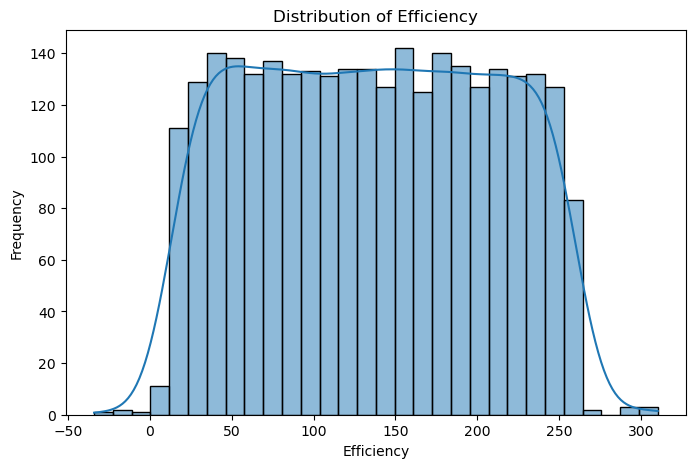

In [85]:
import matplotlib.pyplot as plt
import seaborn as sns

plt.figure(figsize=(8, 5))
sns.histplot(df_shuffled['Efficiency'], bins=30, kde=True)#Kernel Density Estimation creastes a smooth histogram rather than step like graph   
#number of intervals (bins) into which data is grouped in a histogram
plt.title('Distribution of Efficiency')
plt.xlabel('Efficiency')
plt.ylabel('Frequency')
plt.show()

#outcome long tail suggest possible outliers    2 peaks suggest 2 common values


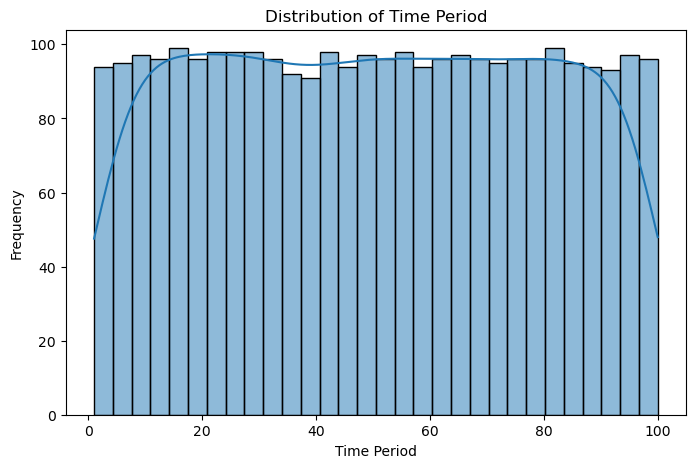

In [86]:
plt.figure(figsize=(8, 5))
sns.histplot(df_shuffled['Time_Period'], bins=30, kde=True) #bins=30 means your data is split into 30 intervals equally spaced along x axis if bin =5 means 5 dabbe
plt.title('Distribution of Time Period')
plt.xlabel('Time Period')
plt.ylabel('Frequency')
plt.show()
# outcome 3 peaks suggest 3 common time periods

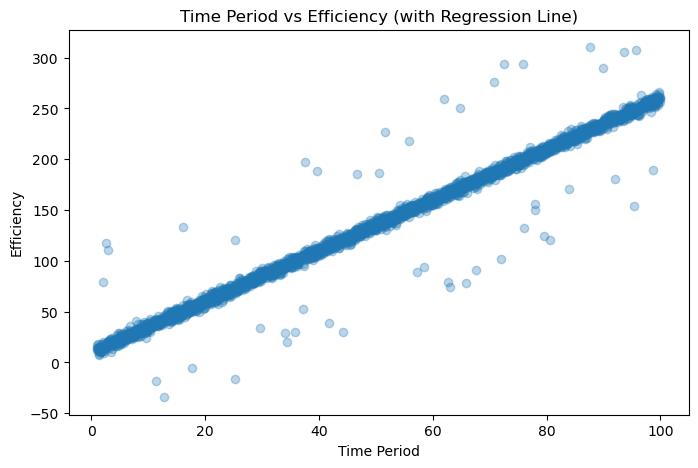

In [87]:
plt.figure(figsize=(8, 5))
sns.regplot(x='Time_Period',y='Efficiency', data=df_shuffled, scatter_kws={'alpha':0.3}) #scatter_kws=alpha for opacity kws means keyword argumants(kwagrs)
plt.title('Time Period vs Efficiency (with Regression Line)')
plt.xlabel('Time Period')
plt.ylabel('Efficiency')
plt.show()
#outcome The regression line is nearly flat, indicating that
# "Time Period" does not significantly predict or explain the changes in "Efficiency".

#this reg line is not our model , it is done by seaborn regplot 
# #as it is fitting a simple linear reg model to data purely for eda by itself

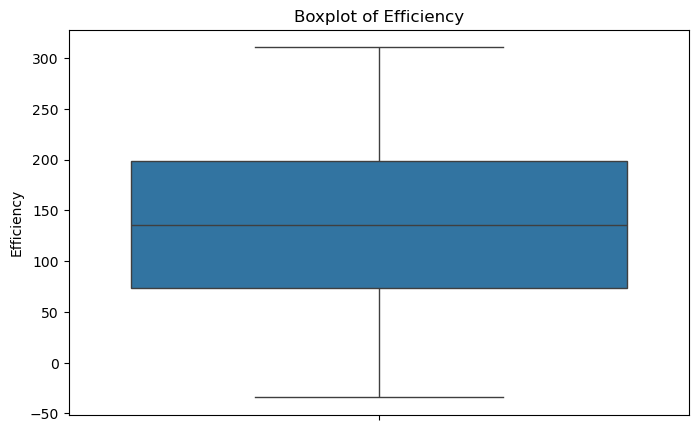

In [ ]:
plt.figure(figsize=(8, 5))
sns.boxplot(y='Efficiency', data=df_shuffled)#boxplots help you quickly see the center, spread, and extreme points (outliers) in your data.
plt.title('Boxplot of Efficiency')
plt.ylabel('Efficiency')
plt.show()
#Box: Shows center and spread for most data (middle 50%)
#Whiskers: Show typical minimum and maximum values
#Dots above whisker: Show outliers, representing extreme data points beyond usual limits. not here

#box mental value=value
#Lower edge: 25% of data is below this value.
#Upper edge: 75% of data is below this value.
#Line inside box: Median  the middle value of your data.

In [ ]:
X_train = train[['Time_Period']].values.astype(float) # double brackets to keep 2d shape 
y_train = train['Efficiency'].values.astype(float)
X_test = test[['Time_Period']].values.astype(float)
y_test = test['Efficiency'].values.astype(float)
# Extract features and convert to numpy arrays 
print(X_train.shape, y_train.shape, X_test.shape, y_test.shape)

(1000, 1) (1000,) (1000, 1) (1000,)


In [ ]:
#Model definition with loss tracking
class SimpleLinearRegression:
    def __init__(self):
        self.w = 0.0
        self.b = 0.0
        self.losses = []
    def fit(self, X, y, iterations=1000, learning_rate=0.01):
        n = len(y)
        X_flat = X.flatten()
        for i in range(iterations):
            y_pred = self.w * X_flat + self.b
            error = y_pred - y
            loss = np.mean(error ** 2)
            self.losses.append(loss)
            #gradient descent update
            self.w -= (learning_rate * 2/n) * np.sum(X_flat * error)
            self.b -= (learning_rate * 2/n) * np.sum(error)
            
    def predict(self, X):
        return self.w * X.flatten() + self.b
    
    def mse(self, y_true, y_pred):
        return np.mean((y_true - y_pred) ** 2)
    
    def rmse(self, y_true, y_pred):
        return np.sqrt(self.mse(y_true, y_pred))
    
    def r2_score(self, y_true, y_pred):
        ss_res = np.sum((y_true - y_pred) ** 2)
        ss_tot = np.sum((y_true - np.mean(y_true)) ** 2)
        return 1 - (ss_res / ss_tot)

In [ ]:
# Feature scaling
X_mean = X_train.mean(axis=0)
X_std = X_train.std(axis=0)
X_train_scaled = (X_train - X_mean) / X_std
X_test_scaled = (X_test - X_mean) / X_std



In [ ]:
# Train the model
model = SimpleLinearRegression()
model.fit(X_train_scaled, y_train, iterations=1000, learning_rate=0.01)



In [ ]:
#Evaluate 
y_pred = model.predict(X_test_scaled)
print(f"MSE: {model.mse(y_test, y_pred):.6f}")
print(f"RMSE: {model.rmse(y_test, y_pred):.6f}")
print(f"R² Score: {model.r2_score(y_test, y_pred):.6f}")
print(f"Accuracy: {model.r2_score(y_test, y_pred)*100:.2f}%")


MSE: 119.425758
RMSE: 10.928209
R² Score: 0.976967
Accuracy: 97.70%


In [94]:
print(np.corrcoef(X_train_scaled.flatten(), y_train))
#output correlation is 0 << 0.98 therefore feature and label are related

[[1.        0.9896359]
 [0.9896359 1.       ]]


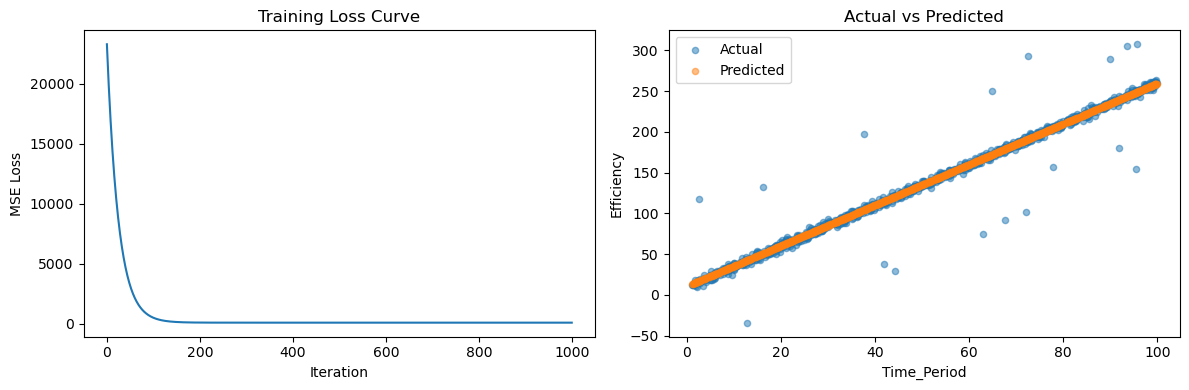

In [95]:
#visualizations

plt.figure(figsize=(12, 4))
plt.subplot(1, 2, 1)
plt.plot(model.losses)
plt.xlabel('Iteration')
plt.ylabel('MSE Loss')
plt.title('Training Loss Curve')

plt.subplot(1, 2, 2)
plt.scatter(X_test, y_test, alpha=0.5, label='Actual', s=20)
plt.scatter(X_test, y_pred, alpha=0.5, label='Predicted', s=20)
plt.xlabel('Time_Period')
plt.ylabel('Efficiency')
plt.legend()
plt.title('Actual vs Predicted')
plt.tight_layout()
plt.show()


In [96]:
print(f"Learned Linear Regression Equation: y = {model.w:.4f} * x + {model.b:.4f}")


Learned Linear Regression Equation: y = 71.1656 * x + 134.5429
